## 机器学习基石
这篇文章是对台大林轩田老师的同名课程（Machine Learnig Foundation, MLF）的总结笔记，主要分四个大部分：什么时候可以用ML、为什么ML可以work、怎么样用ML、怎么把ML用的更好，或者叫围绕这四个问题来展开叙述。

### WHEN

I. motivation

    复杂系统的特点：
+ 规则太多人工很难穷举（火星探测器的自动驾驶）
+ 规则很难提取（语音、视觉）
+ 人工系统不能实时学习、快速决策（高频交易）
+ 子系统非常多，人工维护难（基于用户的推荐系统等）。

    如果机器可以自己学习，包括学习特征和组合方法，上面的复杂系统就变的可行。

II. ML的可行性

    如果一个问题本身满足三个条件：
+ 确实有一些隐含的模式（规则）
+ 人工系统实现这个问题比较困难（参照上面复杂系统的几个特点）
+ 有一些蕴含这些规则的数据。

那么她就是ML的用武之地（When）了。

III. ML的成功应用

+ 衣食住行
    + 衣：根据用户调查和销售数据，为用户推荐时装搭配
    + 食：根据推特上的状态和位置，为用户提供餐馆的水平指数
    + 住：根据建筑的结构和她的能耗的历史，推断其它建筑的的能耗
    + 行：根据交通信号的图片和意义，实现自动驾驶 
    
    可以看出ML无处不在。    
+ 寓教于乐
  + 在线答题系统（教）：根据学生的实时能力选择相应难度的题目，以不断提高学生能力（从学生的答题情况记录逆向推导出学生的能力和题目的难度）
  + 用户推荐系统（乐）：Netflix：0.1B rattings, 0.48M users, 17K movies; Yahoo!: 0.25B, 1M, 0.6M songs） 
    
    这两个问题都可以用推荐系统（协同过滤）的思路建模。

IV. ML和其它三个名词的关系
+ ML: 利用数据，推断一个未知目标函数（f），得到一个近似函数g
+ Data Mining: 挖掘数据本身的一些有趣属性，其中也包括挖掘出一个g，其近似于f；ML和DM相辅相成，很难区分
+ Artificial Intelligence: 得到智能的东西，其通过计算的方式实现智能。ML是AI目的的一条途径。AI还有一些传统的途径
+ Statistics: 对未知量（unknown process）进行推断（inference），这与ML的目的不约而同。传统的统计更注重理论，不太注重实现（计算量）。

V. 学习问题的种类
+ 根据Y的定义域：
    + 二项、多项分类，回归
    + 结构学习（Structured Learning）：很大很大的多项分类问题，其Y的域是许多小的多项分类问题输出y_i的（乘法）组合（并且整体满足一定限制条件），这种限制条件下的组合就叫原问题的结构。比如序列标注等。

+ 根据有没有Y：
    + 有监督（Supervised）：分类和回归
    + 无监督（Unsupervised）：聚类、密度分析（无监督回归）、异常点检测（无监督分类）
    + 半监督（Semi-supervised）：减少标注成本
    + 强化学习（Reiforcement Learning)：只有间接（隐含）的y：y^hat。根据(X, y^hat, goodness)的三元组学习到真正的y。通常学习过程是序列发生的(online)。比如在线广告系统（customer, ad choice, ad click earning)，网络扑克（cards, startegy, winning amount）

+ 根据得到数据的方式（Protocol）：
    + 被动：batch（填鸭式，一次喂个够）、online
    + 主动：Active Learning，目的是减少需要标记的数量（一种半监督的实现思路？）
    
+ 根据X的类型：
    + Concrete Features: 领域知识，特征有很强的物理意义（客户信息，病人履历等）
    + Raw Features: 比CF抽象，较少的物理意义，比如图像的像素矩阵，声音等。可以转化为CF（特征工程），比如得到（对称性，密度）的二元特征
    + Abstract Features: 没有物理意义，比如推荐系统中的X：（userid, itemid）。也可以转化为CF，比如得到user factor 和 item factor
    
    现实的系统中往往综合运用上述三种特征。

### WHY

I. Hoeffding Inequality

   对于某个特定的h，和任意一个大小为N的数据D（iid自真实分布P(X, Y)），h的in-sample error和out-sample error满足下面的概率条件：

$$ P(|E_{in}(h) - E_{out}(h)| > \epsilon) <= 2 e^{-2 \epsilon^2 N} $$

左边的概率还有一个名字，即P(D is Bad Case of h)。如果h在D上的$E_{in}$和$E_{out}$相差非常大（$> \epsilon$），那么说D是h的Bad Case。

   在epsilon非常小、N足够大的情况下，我们可以说$E_{in}(h) = E_{out}(h)$是PAC的（Probalistic Approximate Correct）。如果此时正好$E_{in}(h)$足够小，那么h是一个好的学习结果（h = f也是PAC的）。

   但是上述是一种理想情况，因为不能对所有的问题（f）都猜一个固定的h，这样感性上也会觉得不靠谱（即$E_{in}(h)$很可能会很大）。对于某个问题，我们往往需要通过某个模型从一个巨大（甚至无限）的hypothesis set（H）中选出一个g。这个选择的结果可能会选到任意一个h，所以要求D在整个H中都不是Bad Case。


II. Finite Bin Hoeffding

假设原始数据分布（X，Y）的样本大小为2N，已知的样本（D）数为N。那么P(D is Bad Case in the H)的上界是多少？

我们已有样本空间是所有可能的D，里面有一些子集是$B_1, B_2, ...$，分别是$H_1, H_2, ...$的Bad Case。可以想象的出，这些子集是完全互斥的，而是有覆盖交叠。如果我们假设所有子集之间完全互斥，那么求得的P（D is Bad Case) 的上界会过于宽松。但是精确的求子集和的面积比非常难，所以我们只考虑那些完全重叠的子集，把它们的子集归一化（只计数一次），从而尽可能缩小上界。

两个不同的hopythesis的Bad Case什么时候完全一样（重叠）呢？只能是他们对X有一样的分类结果。那么如果我们知道了X的最大可能分类结果的个数M，我们就知道了在将完全重叠的子集归一后，剩下的子集的个数，其也等于M。

由于M依赖于具体的h和X的个数2N，所以应该是$m_h(2N)$。根据加法原理，我们可以得出P(D is Bad Case in the H)

$$  = P(\exists h, |E_{in}(h) - E_{out}(h)| > \epsilon) <= 2 m_H(2N) e^{-2 \epsilon^2 N} $$


III. Infinite Bin Hoeffding

但是显然X的大小不是D的两倍，甚至可能不是有限的。那么我们辛辛苦苦求得的上界就没有意义了（也会是无限大），那么D在H上是Bad Case的可能性没有理论保证。那么我们就以此认定问题不可学习嘛？

并不是的，我们可以用$E_{in}^{-}(h)$近似$E_{out}(h)$。其中前者是h在一个validation dataset（$D^{-}$，也是i.i.d.于X）上的error。再经过一些概率变换（这里略去，因为笔者目前还没有参透-_-），最后得到：

$$ P(\exists h, |E_{in}(h) - E_{out}(h)| > \epsilon) <= 4 m_H(2N) e^{-\frac{1}{8} \epsilon^2 N} $$

其中$m_H(2N) <= 2^N$，如果我们能把其上界缩小到从指数函数缩小到$poly(N)$，那么问题的学习就变成（概率）可行。我们引入Bounding Function（B(N, k)），其中k是H的最小的Break Point，即H不能shatter k个（或多于）数据点。进过一番推导（略），我们有$m_H(2N) <= B(N, k) = \sum \limits_{0<=i<k} \binom{N}{i} $。

IV. VC Dimension

为了方便说明物理意义，我们引入VC维（$d_{vc}$）。VC维是关于H的一个属性，即是H最大的non-break point，也即最小的break point（k） - 1；H在k个数据点上的分类结果个数始终小于$2^k$。

经过一番推导（略），得到：
$$ m_H(N) <= N^{d_{vc}}, s.t. N >= 2, d_{vc} >= 2$$
即我们有了$poly(N) = N ^ {d_{vc}}$，如果我们选择VC维合适的H，那么问题学习终于变得可行了！


为了更方便的说明物理意义，我们另$ \delta = 4 m_H(2N) e^{-\frac{1}{8} \epsilon^2 N}$，然后我们有很大的概率$( >= 1 - \delta)$，满足：

$$ E_{out}(g) <= E_{in}(g) + \sqrt{\frac{8}{N}ln(\frac{4(2N)^{d_{vc}}}{\delta})} $$

其中最后的根号下的部分叫做对模型复杂度的惩罚：$\Omega(N, d_{vc}, \delta)$)。把$E_{out}(g)$看作$d_{vc}$的单变量函数，得到后者不能太大，也不能太小，需要in the middle。

V. 对实际应用的指导作用

+ $d_{vc} \approx $ 模型参数的个数（#free parameters）

可以看出VC维的大小一定程度上代表了模型的能力。

+ N的最小值是多少？

根据$ \delta = 4 m_H(2N) e^{-\frac{1}{8} \epsilon^2 N}$，我们一般需要的$\epsilon=0.1$、$\delta=0.1$，那么$N \approx 10000 d_{vc}$。但是实际应用中一般满足$N \approx 10 d_{vc}$的话效果就会比较好。


### HOW TO
先讲三种线性模型（hypothesis和相应的参数解法），即h(x)=Wx。然后讲了线性特征的非线性变换。但是作为基础，我们最开始聊一聊Error Function（Err(h(x), y)）。Err加上P(y|x)定义了ideal mini-target function（即f(x)），而f加上噪声定义了y:

+ Err(h(x), y) + P(y|x) => f(x)
+ f(x) + noise = y

真实的数据分布（X，Y）中的Y都类似上面掺杂了噪声。我们可以直接去求P(y|x)（在分类问题上叫软分类），也可以只求f(x)（在分类问题上叫硬分类）。两者都需要定义求解合适的Err实现。

+ 求P(y|x)的Err称为True Err。
    + 二项分类：$E_{CE} = ln(1 + e^{-yh(x)})$
    
    这叫交叉熵(cross entropy)。怎么得出的呢？我们用sigmoid函数$\theta(x) = \frac{1}{1 + e^{-x}}$来建模P(y|x)，有
    
    $$P(y|x) =
        \begin{cases}
        \theta(h(x)) & \text{y = +1}\\
        1 - \theta(h(x)) & \text{y = -1}\\
        \end{cases}$$
        
    $$\Downarrow 1 - \theta(h(x)) = \theta(-h(x)) $$
    $$ P(y|x) = \theta(yh(x)) = \frac{1}{1 + e^{-yh(x)}} $$
    
    现在条件概率的猜想形式有了，但是伪真实（观察得到）的条件概率我们不知道，或者应该说太稀疏不可用，所以很难参数优化我们的猜想。所以我们考虑用必要条件代替充分条件，即如果我们猜想的P(y|x)跟真实的接近，则在他们之上的D的生成概率也会很接近，即都会很大。我们可以用猜想的P(y|x)形式化的表示出D的生成概率，取个反，我们需要这个取反后的概率尽可能小。这样一看，他就等效于我们需要尽可能小的error function。做一些变换，我们就得到了上面的point-wise error function $E_{CE}$。
    
    + 多项分类：$E_{Softmax} = - ln(\frac{e^{h(x, y)}}{\sum \limits_{Y} e^{h(x, y)}}) $
    
    这叫Softmax。怎么得出的呢？其实也是根据生成概率最大化求的（有兴趣的读者自己试试）


+ 求f(x)的Err有许多种，取决于我们需要什么样的f(x)，即通过后者反推前者。f(x)可以看做P(y|x)这个（条件）分布上的某个统计量，所以有很多选择。下面是一些f(x)的选择和其相应的Err：
    + 概率最大的y：$E_{01} ＝ 1(sign(h(x)) != y) = 1(yh(x) <= 0) $
    + y的期望：$E_{square} ＝ (h(x) - y)^2 = (yh(x) - 1)^2$
    + y的概率中位数：$E_{abs} = |h(x) - y| = |yh(x) - 1|$
    
  但也可以先考虑定义Err，再看f(x)。这样的好处是可以实现Weighted Classification。拿二项分类举例，即对False Negative和False Positive两种错误在Err中赋予不同的权重。
  
下面我们可视化一下这几个error function：

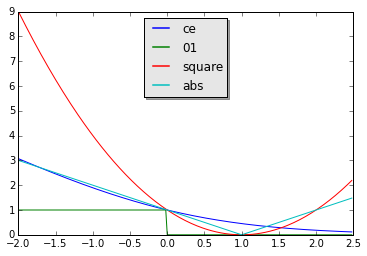

In [82]:
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import math

yhx = np.arange(-2,2.5,.02)
err_ce = map(lambda x: math.log(1 + math.exp(-x)) / math.log(2), yhx)
err_01 = map(lambda x: 1 if x <= 0 else 0, yhx)
err_square = map(lambda x: (x - 1) * (x - 1), yhx)
err_abs = map(lambda x: math.fabs(x - 1), yhx)

fig, ax = plt.subplots()
ax.plot(yhx, err_ce, label='ce')
ax.plot(yhx, err_01, label='01')
ax.plot(yhx, err_square, label='square')
ax.plot(yhx, err_abs, label='abs')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper center', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

从上图可以看出，其它几个Err都是$E_{01}$的上界。注意，为了突出这一点，我们将$E_{CE}$的底由e换成了2.

留下的问题是$E_{softmax}$怎么可视化（todo）？

I. PLA 和 Pocket

+ PLA
    + error func: $ 0 $
    + 权重更新公式：$W_{t+1} = W_t + Y_i * X_i, 其中(X_i, Y_i)是W_t分错的（任意、或按照一定顺序的某个）数据点 $
    + 迭代停止（充要）条件：数据线性可分。证明的话需要得出：$\frac{W_f^T}{||W_f||} * \frac{W^t}{||W^t||} >= sqrt(t) * constant$，其中W_f是目标权重，$W^t$是迭代t次后的权重，t是迭代次数，constant是某个常数。因为$\frac{W_f^T}{||W_f||} * \frac{W^t}{||W^t||}$最大为1，所以t是有限的。
    + 复杂度：
    
+ Pocket
    在数据线性不可分的时候可以考虑用Pocket，其与PLA的不同：
    + error func: $ E_{0/1} $
    + 权重更新：只有PLA计算得到的$W_{t+1}的E_{0/1}比W_t小的时候$，才用前者替代后者
    + 迭代停止条件：足够多的次数（经验值）
    + 复杂度：

II. Linear Regression

+ error func: $ E_{in}(h(x), y) = E_{square}(Wx, y) $
+ 权重更新：没必要？
+ 迭代停止条件：足够多的次数（经验值）
+ 解析解：$ W_{LIN} = (X^T X)^{-1} X^T y $

    注意，其中$(X^T X)^{-1} X^T $叫做X的伪逆，单独讲他是因为其在$X^T X$不可逆的时候（singular），还是有其他的方法可以算出。
+ 复杂度：

III. Logistic Regression

+ error func: $ E_{in}(h(x), y) = E_{CE}(Wx, y) $
+ 权重更新：

$$ W_{t+1} = W_t - \eta \nabla E_{in}(W_t) 
        = W_t - \eta \frac{1}{N} \sum \limits_{N} \theta(-y_N W_t^T x_N) $$

    这里$\eta$叫做学习率（learning rate），控制梯度下降的速度。实践中一般取0.1。
+ 迭代停止条件：足够多的次数（经验值）
+ 解析解：无
+ 复杂度：

除了二元分类，还有多元分类。

 + 通过二元分类实现的多(K)元分类
  + One VS All（OVA）
    + 复杂度：O(K * 二元分类的复杂度)
        
    优点：实现相对简单
        
    缺点：类别失衡
        
  + One VS One（OVO）
    + 复杂度：O(K * K * 二元分类在最大的两个类别的数据集合上的复杂度）
        
    优点：不容易出现类别失衡、实际运行速度往往比OVA快
        
    缺点：需要的空间复杂度大（保存参数）
        
 + 直接多元建模的多元分类
  + Softmax（todo）
    + 复杂度：
   
  + Multinomial Logistic Regression（todo）
    + 复杂度：
        
 其实OVA和OVO可以看做一个目标函数（Err，其实就是$E_{01}$）不能直接优化的分类模型，但是可以通过构成他的小的二元分类模型间接优化。
 
 下面的三维度演示了两种分类方法的Err情况。可以看出，Softmax相对于（结果通过概率分布取最大值实现）OVA或OVO（结果通过二元分类器的最大投票决定），前者的Err是后者的上界。

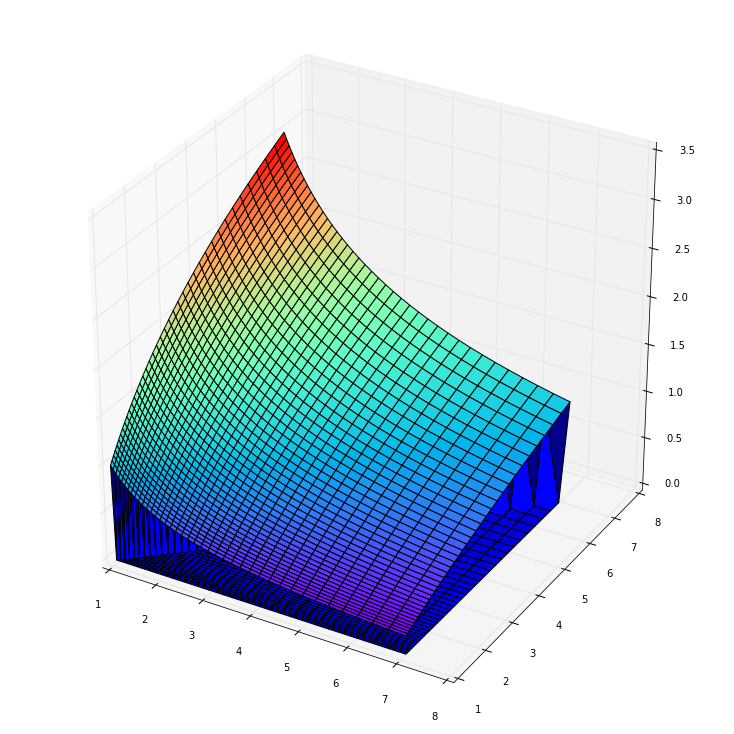

In [92]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure(figsize=(10,10))
ax = Axes3D(fig)
X = np.arange(0.01, 2, 0.05)
Y = np.arange(0.01, 2, 0.05)
X, Y = np.meshgrid(X, Y)
X, Y = np.exp(X), np.exp(Y)

err_softmax = -np.log(X / (X + Y)) / np.log(2)
err_max = np.array([[0 if X[i,j] > Y[i,j] else 1 for j in range(len(X[0]))] for i in range(len(X))])

ax.plot_surface(X, Y, err_softmax, rstride=1, cstride=1, cmap='rainbow', label='softmax') 
ax.plot_surface(X, Y, err_max, rstride=1, cstride=1, label='OVO or OVA') 

show()

IV. Nolinear Transformation

通过特征变换，将d个维度的原始特征，变换为Q（>= d）个维度（升维），达到了复用机器学习模型、同时提高模型VC维的目的（即模型的能力）。所以实践中要注意Q的合适选取。

另外，通过上述变换，会得到$Q+d \choose d$ 个维度，为什么?

### HOW TO BE BETTER

I. 刹车（Deal with Overfitting）

可以把学习过程理解为开车，而VC维的大小理解为车速的大小。车的速度不是越快越好，要及时刹车，不然不安全。可以通过往Err上面加限制条件的方式达到限制（缩小）Hypothesis Set的目的，即降低VC维，刹车。加了限制条件的Err，可以通过拉格朗日乘子法变成一个加了Regularizer的新Err。举例说明：

    
常用的Regularizer有两种：
    
+ L1：$\sum \limits_{D} |W_D|$

    优点是可以得到稀疏解。
    
+ L2(ridge)：$ \sum \limits_{D} W_D^2 $

    优点是易于优化。
    
当然，也可以更具自己对当前问题的解的先验知识来选取特定的Regularizer，比如要让f满足对称性，可以选用symmetry regularizer：$ \sum \limits_{D} 1(D=odd) W_D^2 $ 或 $ \sum \limits_{D} 1(D=odd) |W_D| $。

II. 监控仪表盘（Parameter Tuning）
 + 到目前为止我们需要手工指定的参数（超参数）有：
  + 哪种模型（LRegression? LR? Pocket?）
  + 多项式非线性变换中的Q多大?
  + 梯度下降中的学习率$\eta$多大
  + 哪种Regularizer？
  + Weighted Classification 中 False Negative 和 False Positive的权重比是？
  + 多元分类到底是用OVA 还是 OVO 还是 Softmax？
    等等
    
  这些参数（决策）的组合本身就是指数增长的（假设最后的组合数目为M），如果这些组合统统都在$E_{in}$上一较高下，那么就相当于拿了一个VC维度非常巨大（$\sum \limits_{M}|H_m|，|H_m|是h_m的Hypothesis Set大小$）的Hypothesis Set来进行优化，找出其中的g。这就相当于有了一个VC维度巨大的新的模型，这就不能保证问题是可以学习的了（参考WHY小节）。那么如果我们在一个保留的validation Dataset上验证Err（$E_{val}$），那么我们用来找g的Hypothesis Set的大小则是M。这样在M不是很大的时候，问题就是可以学习的。

  但是我们去哪里找这个validation Dataset呢？方法便是从D中保留一块，这种方法叫做Cross Validation，具体分为：

 + Leave One Out(LOO)
 
  策略：D的大小为N，则每次用N-1个数据训练，然后用剩下的1个数据计算$E_{val}$，枚举每个数据，最后求得$E_{val}$的均值就是的$E_{val}$：
  $$
  \begin{equation} \label{}
  \begin{split}
  E_{loo}(H_m) & = \frac{1}{N} \sum_{N} E_{val}(H_m, n) \\
               & = \frac{1}{N} \sum_{N} E_{point-wise}(h_m(X_n), Y_n)
  \end{split}
  \end{equation}
  $$          
  其中$h_m$是$A_m$基于$D-X_n$的数据集，在$H_m$空间中找到的最优的h（这是一个训练过程）。注意，这里用了泛化的$E_{point-wise}$来代表所有可能的具体的point-wise的Err，因为后者也可能是一种超参数。
    
  那么最后要求的g就是：
  $$
  \begin{gather*} 
  G = \underset{H_m}{\mathrm{argmin}}  E_{loo}(H_m) \\ 
  g = A_G (G, D)
  \end{gather*}
  $$
  其中G是g所在的Hypothesis Set，而$A_G$是跟其配套的算法。注意最后的g是在整个D上计算所得。可以证明（略）：$E_{loo}(H_m)$ ‘几乎’是$E_{out}(g_m)$的无偏估计(almost unbiased estimate）。而$E_{in}(H_m)$则不是。
    
  从上面可以看出LOO的复杂度为$O(N*\sum$单个模型的复杂度$)$，当N很大时会非常高，实际应用非常有限。
    
 + K-Fold

  为了克服LOO复杂度高的缺点，我们才用V叠交叉验证代替之。其原理就是将D等分为K份，然后每次用一份作为Validation Dataset，枚举每一份。这样复杂度便降为$O(K*\sum$单个模型的复杂度$)$。实际应用中K一般取5~10。

III. Power of Three

讲三个大有用处的小技巧。
+ 奥卡姆剃刀

    在所有合适的模型里面，选用尽可能简单的。
    
    
+ 采样偏差

    训练数据和测试数据可能通过不同的分布从真实分布中采样得到。
    
    
+ 数据偷看

    通过对训练数据进行挖掘，抽取出更好的特征（$E_{in}$小）。其实你人工抽取特征的过程也是一个Hypothesis Set增大的过程，这样你就无形中增加了模型的VC维，可能使得问题的学习变的不可行。
    
    但也不是一点也不能偷看，还是回到VC维度大小的选取问题。

## 自己的总结


+ 判别式和生成式

    上面模型的Hypothesis，不管是直接建模P(y|x)，还是通过建模f来间接近似P(y|x)，都是对条件概率P(y|x)建模。这种模型是判别式的。

    而也可以对全概率P(x, y)建模，这样的模型是生成式的。虽然我们的目的还是求的P(y|x)，但这可以很容易的通过贝叶斯定理实现：

$$ P(y|x) = \frac{P(x, y)}{P(x)}$$

    由于P(x)是固定的，我们可以只求出针对不同y的P(x,y)，然后做一个归一化就行了。那P(x,y)到底该怎么建模呢？一半都是基于一些假设，比如我们可以假设：
    
$$ P(x,y) = P(y) * \prod_D P(x_d | y)$$

    这叫朴素贝叶斯假设。基于这种假设的模型常用于垃圾邮件分类、拼写提示等。
    
    生成式和判别式模型有许多可以对比的地方，也各有优缺点。但是这里只说一个：既然前者基于某个假设，那么他其实是强制把模型的Hypothesis Set固定在一个经过这个假设正则化后的空间中。如果这个Regularizer可以很好的描述D，那么模型就work了，而且需要的训练数据也较小（为什么？提示：VC维低了）。否则，她就可能效果很差。所以应用生成式模型之前一定要研究一下数据是否符合该模型的假设。

    两种模型的详细比较准备单独一讲总结（todo）。